импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import Trainer,three_layer,up_three_layer,up_three_layer_multi,ImprovedRegressionNN

import matplotlib.pyplot as plt
#путь к корню директории
#from setting import BASE_DIR
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
model = ImprovedRegressionNN( 
    input_size = X_train.shape[1], # window_size*num_features - 1
    output_size = target_window_size,
    hidden_size1 = 64,
    hidden_size2 = 64,
    hidden_size3 = 64,
    device = device)

trainer = Trainer(
    model=model,
    learning_rate=0.001,
    device= device
)

In [4]:
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=32,
    epochs=700,
    loss_tube=5
)

Epoch 10
Main: 0.378301, MAPE: 0.176227
Test - MAPE: 0.522004, Tube: 0.108932
Epoch 40
Main: 0.329682, MAPE: 0.152071
Test - MAPE: 0.067087, Tube: 0.478528
Epoch 80
Main: 0.326604, MAPE: 0.150516
Test - MAPE: 0.069269, Tube: 0.460636
Epoch 120
Main: 0.334803, MAPE: 0.153237
Test - MAPE: 0.062007, Tube: 0.536931
Epoch 160
Main: 0.328281, MAPE: 0.150873
Test - MAPE: 0.071089, Tube: 0.478099
Epoch 200
Main: 0.330326, MAPE: 0.150656
Test - MAPE: 0.067617, Tube: 0.486688
Epoch 240
Main: 0.331694, MAPE: 0.152260
Test - MAPE: 0.073089, Tube: 0.407529
Epoch 280
Main: 0.325608, MAPE: 0.150535
Test - MAPE: 0.069219, Tube: 0.433581
Epoch 320
Main: 0.324973, MAPE: 0.150607
Test - MAPE: 0.066257, Tube: 0.471514
Epoch 360
Main: 0.325630, MAPE: 0.149293
Test - MAPE: 0.072205, Tube: 0.425136
Epoch 400
Main: 0.324590, MAPE: 0.148902
Test - MAPE: 0.072262, Tube: 0.446751
Epoch 440
Main: 0.333205, MAPE: 0.154959
Test - MAPE: 0.069714, Tube: 0.514028
Epoch 480
Main: 0.327682, MAPE: 0.150767
Test - MAPE: 0

In [5]:
LV = LossVisualizer(history)

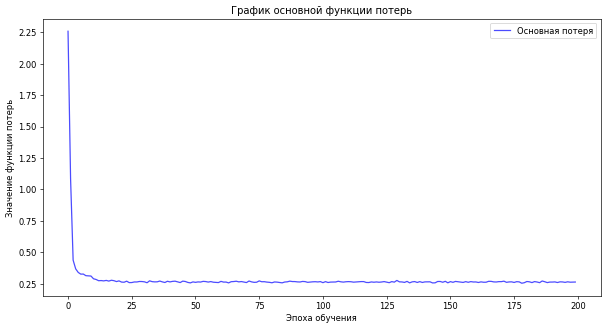

In [6]:
LV.show_training_loss()

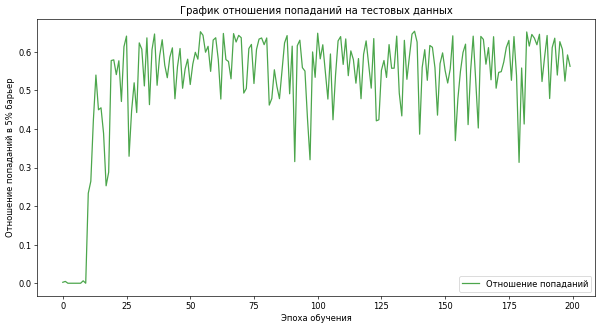

In [7]:
LV.show_test_tube()

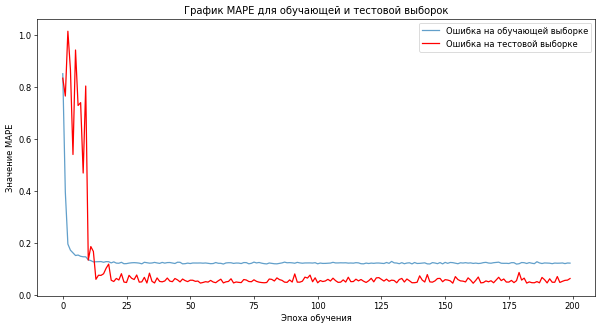

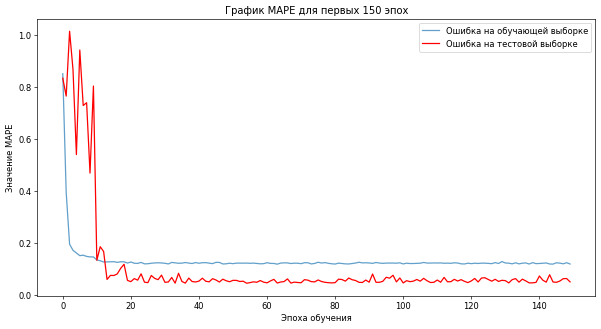

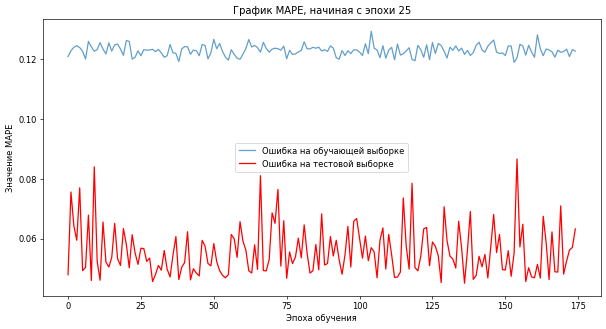

In [10]:
LV.show_mape(start_epoch = 25)

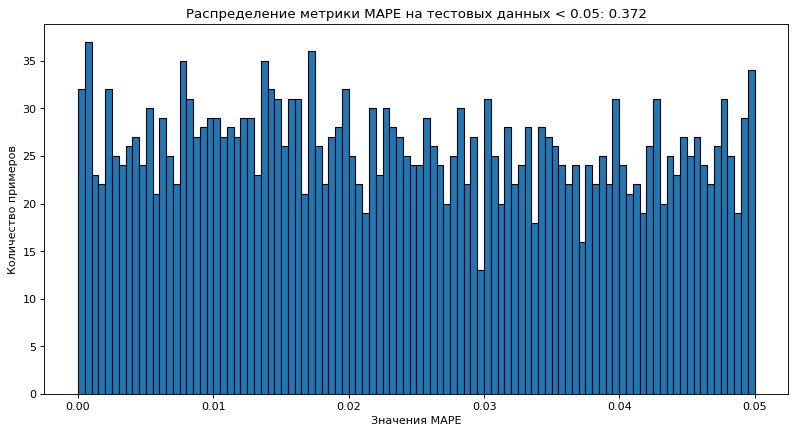

Процент значений MAPE < 0.05: 0.372


In [8]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 5)

Количество записей: 5334


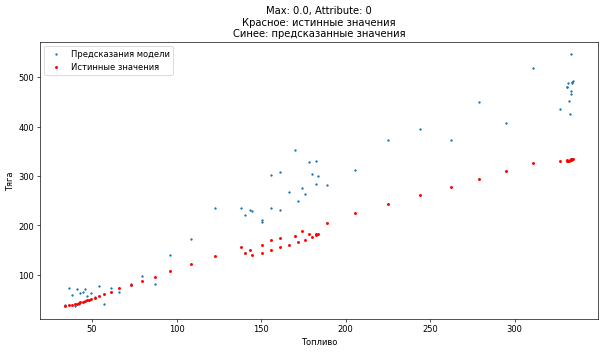

Количество записей: 5334


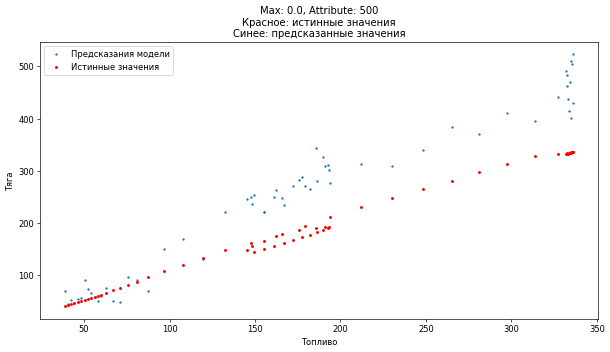

Количество записей: 5334


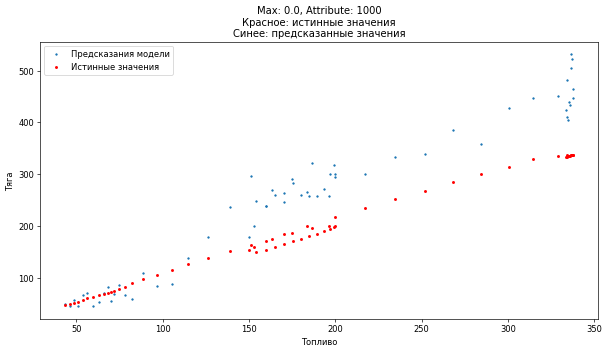

Количество записей: 5334


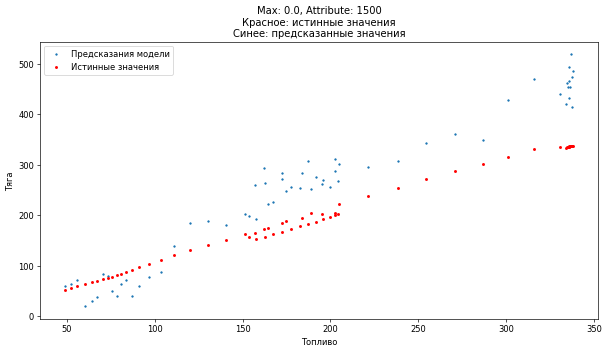

Количество записей: 5334


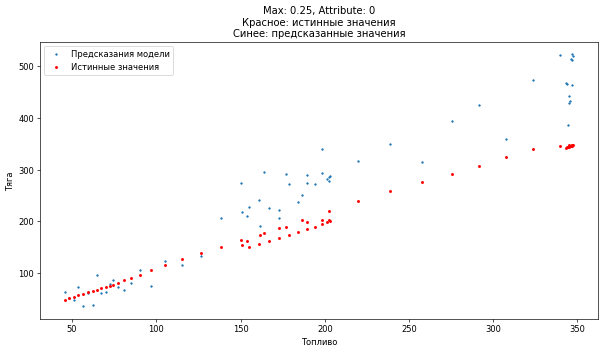

Количество записей: 5334


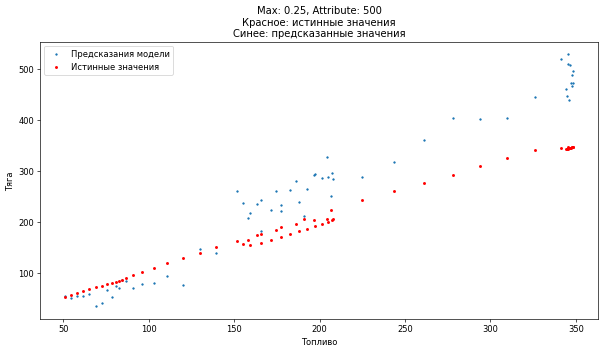

Количество записей: 5334


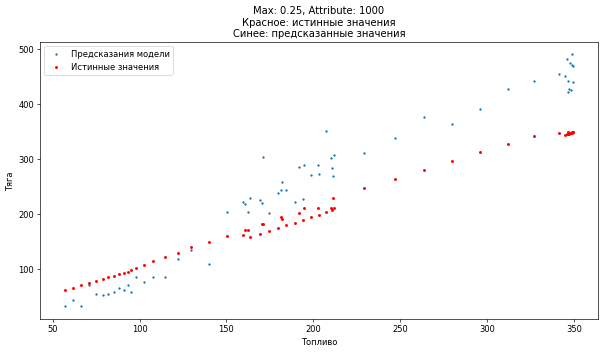

Количество записей: 5334


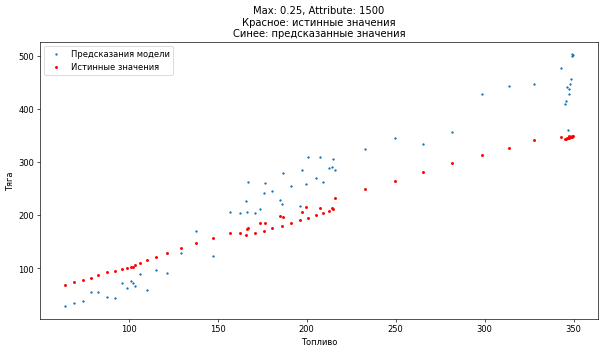

Количество записей: 5334


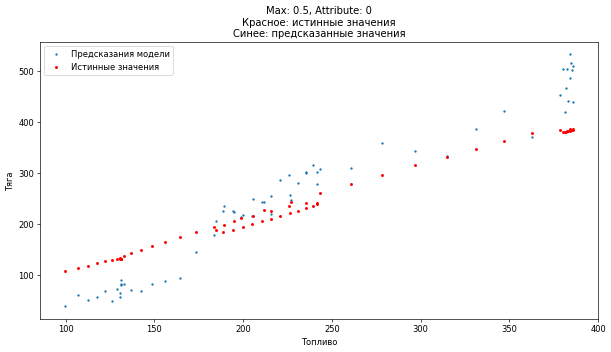

Количество записей: 5334


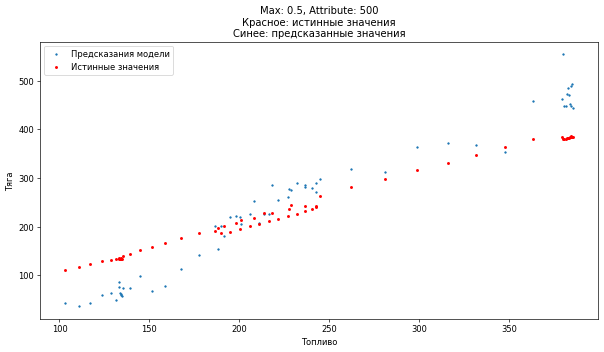

Количество записей: 5334


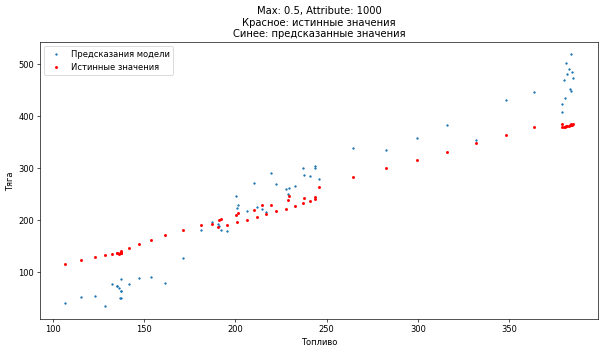

Количество записей: 5334


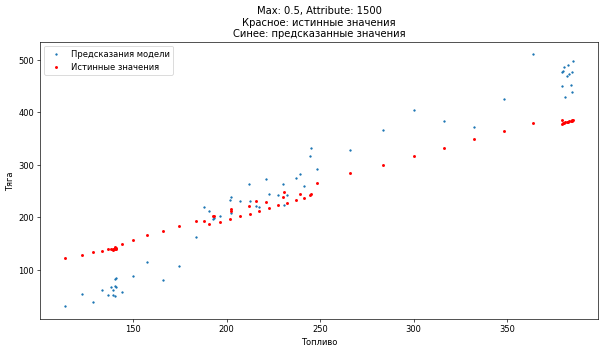

Количество записей: 5334


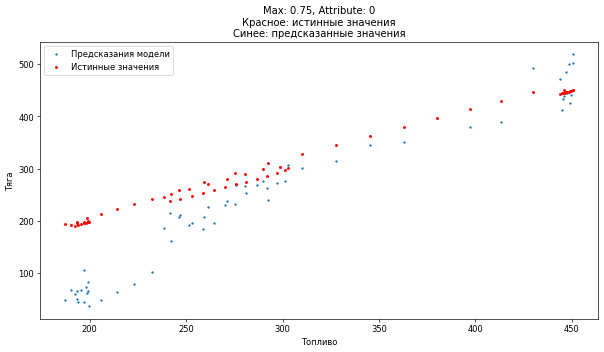

Количество записей: 5334


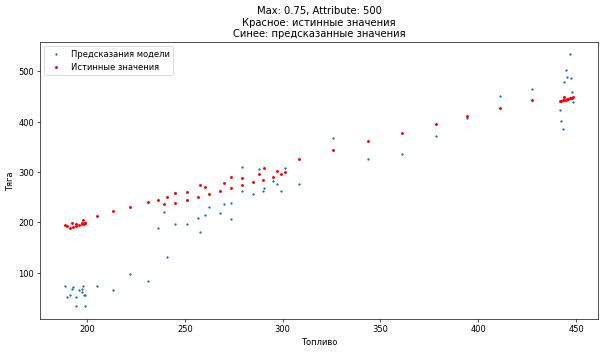

Количество записей: 5334


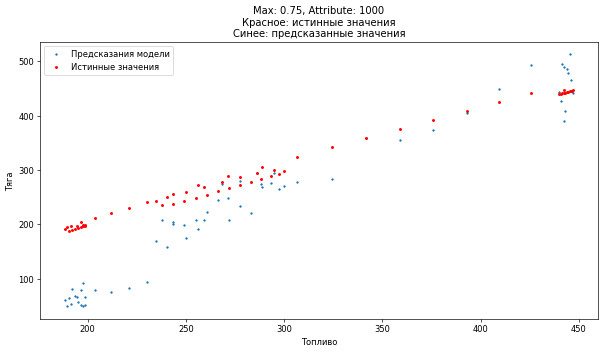

Количество записей: 5334


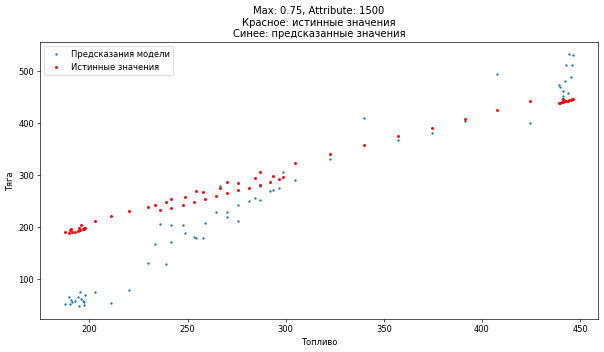

Количество записей: 5334


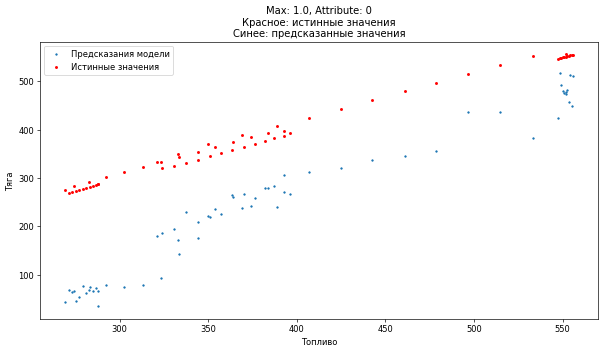

Количество записей: 5334


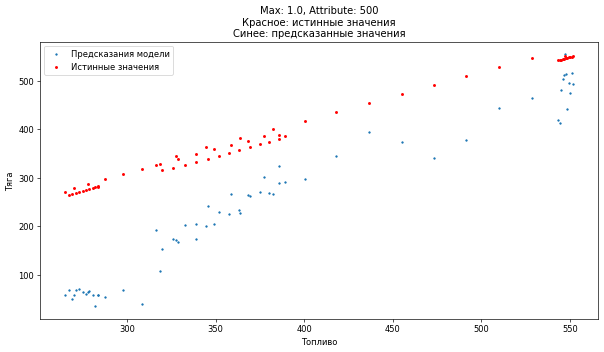

Количество записей: 5334


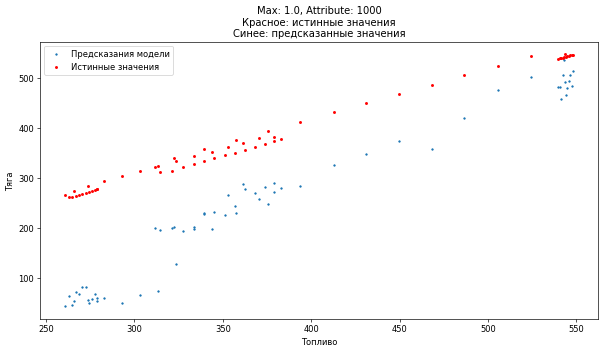

Количество записей: 5334


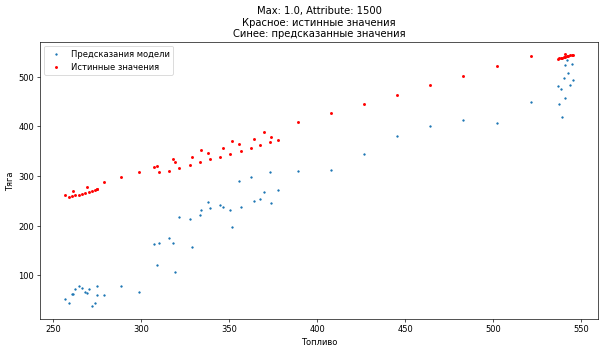

In [9]:
LV.show_predictions(model,df,pd_params,device)